<a href="https://colab.research.google.com/github/rzeta0/Make-Your-Own-Mandelbrot/blob/main/DEM_Mandelbrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mandelbrot Set by Distance Estimator **

"Make Your Own Mandelbrot" Second Edition

This work is licensed under CC BY-SA 4.0

In [6]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

In [7]:
# number of pixels wide and high
resolution = 1024

# bottom left corner of square viewport
#bottom_left = complex(-2.25,-1.5)
bottom_left = complex(-0.7416363282638, 0.1804439806419)

# width and height of square viewport
#size = 3
size = 0.008304417869

# maximum iterations per test
max_iter = 4096

In [8]:
# create image as numpy array

image = np.full( (resolution,resolution), 255, dtype=float)

In [9]:
# test each point in viewport for divergence

# visit every pixel in the image array
for x in range(resolution):
  for y in range(resolution):

    # convert pixel grid location x,y to c
    c = bottom_left + (size * complex(x/(resolution-1), y/(resolution-1)))

    z = complex(0,0)
    dz = complex(0,0)

    # test for divergence
    for iteration_count in range(1,max_iter+1):
      dz = 2.0 * z * dz + 1
      z = (z*z) + c
      abs_z = abs(z)
      if (abs_z > 4): break
      pass

    # distance estimate
    de = 2 * abs_z * np.log(abs_z) / abs(dz)

    # colour pixel according to divergence
    image[y,x] = (255) * np.tanh(de*resolution/size)

    pass # end y loop
  pass # end x loop

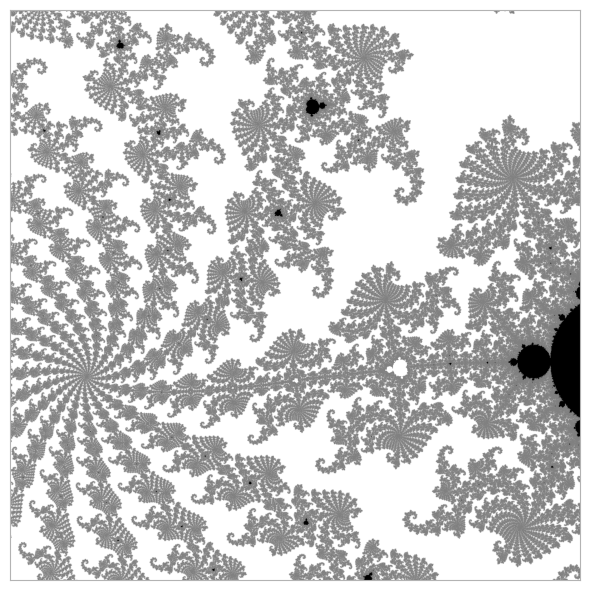

In [10]:
# render image

# create figure of size 6x6
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

# turn of axis ticks
ax.set_xticks([])
ax.set_yticks([])

# grey outline
grey_value = str(0.7)
ax.spines['bottom'].set_color(grey_value)
ax.spines['top'].set_color(grey_value)
ax.spines['right'].set_color(grey_value)
ax.spines['left'].set_color(grey_value)

# plot image array, using grey colour palette
ax.imshow(image, cmap='gray', origin="lower")

plt.tight_layout()

# export the figure as a PNG image file
plt.savefig("dem_mandelbrot.png", dpi=600, format="png")
plt.savefig("dem_mandelbrot.pdf", dpi=600, format="pdf")

plt.show()